<a href="https://colab.research.google.com/github/rishi-29-02/The-Flight-Ticket-Price-Prediction/blob/main/Flight_Price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Flight Price Prediction

## Uploading the Dataset 

In [83]:
#from google.colab import files
#uploaded = files.upload()

## Importing Libraries

In [84]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##Reading the dataset

In [85]:
train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [86]:
train_data.shape

(10683, 11)

In [87]:
train_data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Form the basic data exploration we infer that the two features Route and Total_Stops has 1 missing value.

In [89]:
test_data = pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [90]:
test_data.shape

(2671, 10)

In [91]:
test_data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [92]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


## Feature Engineering

**Airline Feature**

In [93]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

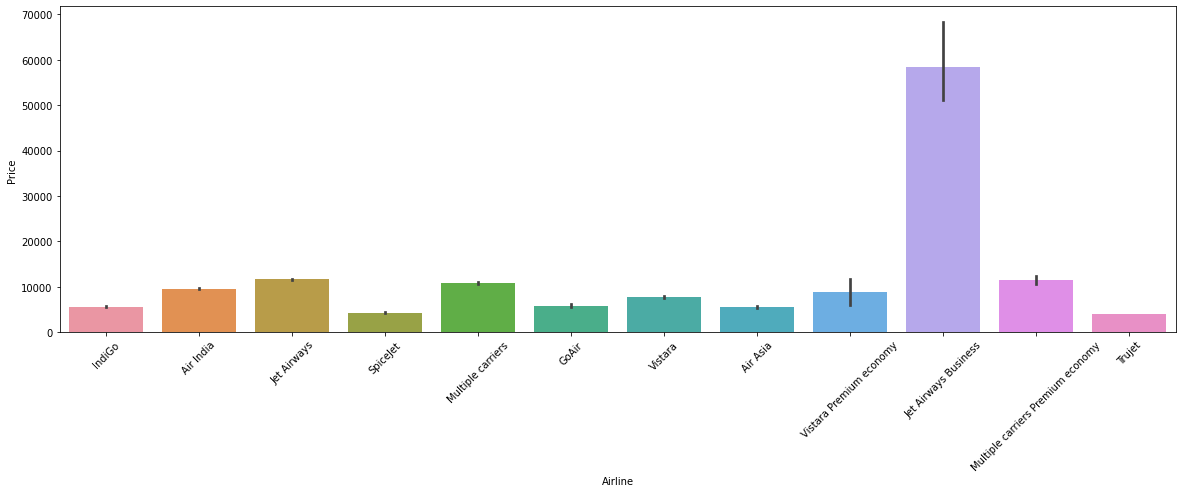

In [94]:
plt.figure(figsize=(20, 6))
sns.barplot(data=train_data, x = 'Airline', y='Price')
plt.xticks(rotation=45)
plt.show()

In [95]:
set(train_data['Airline']) == set(test_data['Airline'])

False

As the airline set is different for train and test set and  therefore  we cannot do the label Encoding.

Thus making the sets same.

In [96]:
train_data = train_data[train_data['Airline']!='Trujet']

In [97]:
set(train_data['Airline']) == set(test_data['Airline'])

True

Now the set becomes same therefore we can do the label Encoding.

In [98]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

train_data['Airline'] = labelencoder.fit_transform(train_data['Airline'])
test_data['Airline'] = labelencoder.transform(test_data['Airline'])

**Source Feature**

In [99]:
train_data['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [100]:
test_data['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [101]:
set(train_data.Source) == set(test_data.Source)

True

Thus we can safely do the label encoding.

In [102]:
train_data['Source'] = labelencoder.fit_transform(train_data['Source'])
test_data['Source'] = labelencoder.transform(test_data['Source'])

In [103]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,1/05/2019,3,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,9/06/2019,2,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,12/05/2019,3,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,01/03/2019,0,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Destination Feature**

In [104]:
train_data['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [105]:
test_data['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [106]:
set(train_data['Destination']) == set(test_data['Destination'])

True

Thus we can safely do the label encoding.

In [107]:
train_data['Destination'] = labelencoder.fit_transform(train_data['Destination'])
test_data['Destination'] = labelencoder.transform(test_data['Destination'])

In [108]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9/04/2019,3,0,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,1,27/04/2019,3,0,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,4,27/04/2019,0,2,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,9,01/03/2019,0,5,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


**Total_Stops Feature**

As we know that this feature contains one missing value.

In [109]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,1,6/05/2019,2,1,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [110]:
train_data = train_data[train_data['Total_Stops'].notnull()]

In [111]:
train_data['Total_Stops'] = train_data['Total_Stops'].str[0]
test_data['Total_Stops'] = test_data['Total_Stops'].str[0]

In [112]:
train_data['Total_Stops'] = train_data['Total_Stops'].apply(lambda x: str(x) if str(x).isdigit() else 0).astype('int64')
test_data['Total_Stops'] = test_data['Total_Stops'].apply(lambda x: str(x) if str(x).isdigit() else 0).astype('int64')

In [113]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


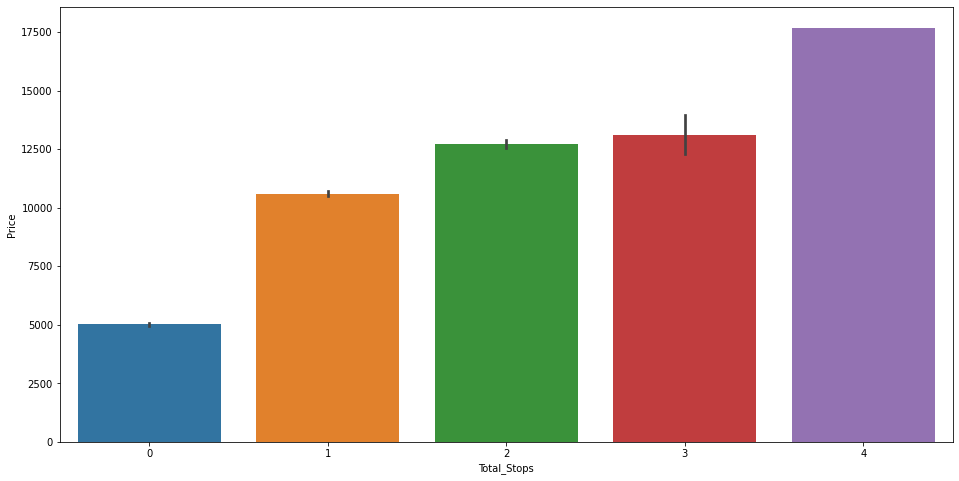

In [114]:
plt.figure(figsize=(16, 8))
sns.barplot(data=train_data, x='Total_Stops', y='Price')
plt.show()

**Additional_Info Feature**

In [115]:
train_data['Additional_Info'].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [116]:
train_data['Additional_Info'] = train_data['Additional_Info'].replace('No Info', 'No info')

In [117]:
train_data['Additional_Info'].value_counts()

No info                         8346
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [118]:
set(train_data['Additional_Info']) == set(test_data['Additional_Info'])

False

As we can clearly infer that the train and test set are not same therfore modifying.

In [119]:
train_data['Additional_Info'] = train_data['Additional_Info'].replace(['2 Long layover',
                                                                       '1 Short layover',
                                                                       'Red-eye flight'], 'Rare')

In [120]:
train_data = train_data[train_data['Additional_Info'] != 'Rare']

In [121]:
train_data['Additional_Info'].value_counts()

No info                         8346
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Name: Additional_Info, dtype: int64

In [122]:
test_data['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

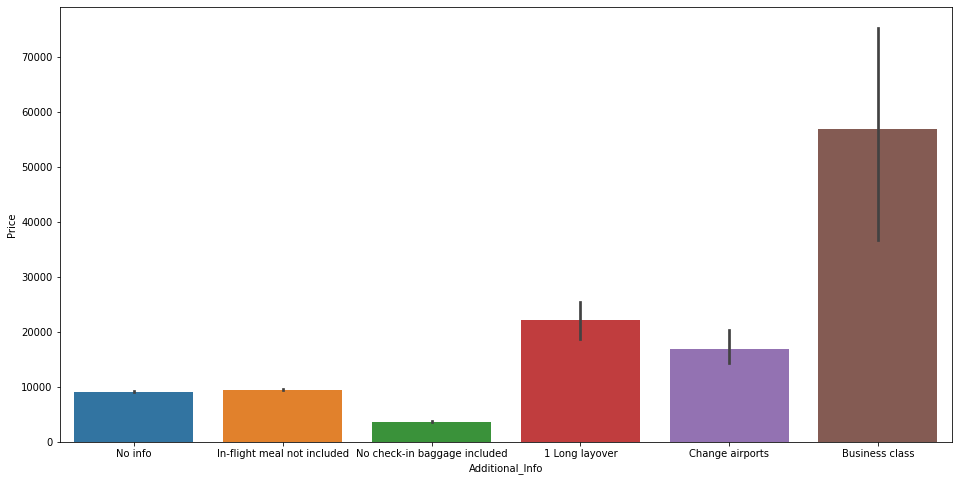

In [123]:
plt.figure(figsize=(16, 8))
sns.barplot(data=train_data, x='Additional_Info', y='Price')
plt.show()

In [124]:
set(train_data['Additional_Info']) == set(test_data['Additional_Info'])

True

Now we can safely do the Label encoding

In [125]:
train_data['Additional_Info'] = labelencoder.fit_transform(train_data['Additional_Info'])
test_data['Additional_Info'] = labelencoder.transform(test_data['Additional_Info'])

In [126]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,5,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,5,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,5,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1,5,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1,5,13302


In [127]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,6/06/2019,2,1,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,5
1,3,12/05/2019,3,0,CCU → MAA → BLR,06:20,10:20,4h,1,5
2,4,21/05/2019,2,1,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,3
3,6,21/05/2019,2,1,DEL → BOM → COK,08:00,21:00,13h,1,5
4,0,24/06/2019,0,2,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,5


**Duration Feature**

In [128]:
train_data['Duration'] = train_data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)
test_data['Duration'] = test_data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [129]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,170,0,5,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,445,2,5,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,5,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,325,1,5,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,285,1,5,13302


**Date of journey feature**

In [130]:
train_data['Date_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey'])
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'])

In [131]:
train_data['weekday'] = train_data['Date_of_Journey'].dt.day_name()
test_data['weekday'] = test_data['Date_of_Journey'].dt.day_name()

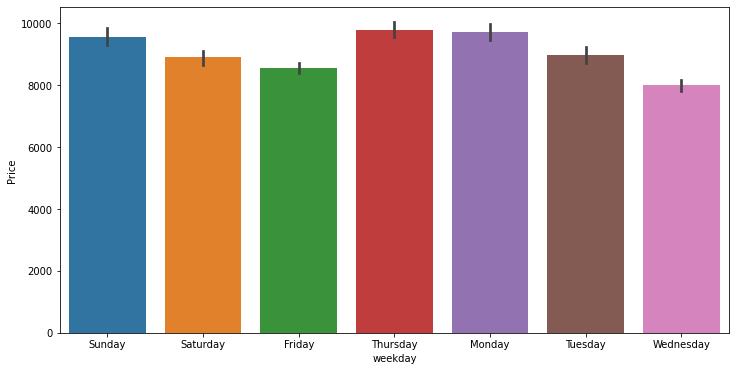

In [132]:
plt.figure(figsize=(12, 6))
sns.barplot(data=train_data, x='weekday', y='Price')
plt.show()

In [133]:
train_data['weekday'] = labelencoder.fit_transform(train_data['weekday'])
test_data['weekday'] = labelencoder.transform(test_data['weekday'])

In [134]:
train_data['Month'] = train_data['Date_of_Journey'].dt.month
test_data['Month'] = test_data['Date_of_Journey'].dt.month

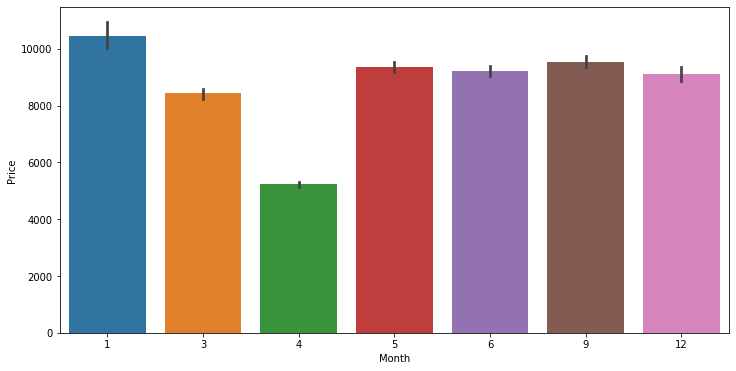

In [135]:
plt.figure(figsize=(12, 6))
sns.barplot(data=train_data, x='Month', y='Price')
plt.show()

Dropping some features

In [136]:
train_data.drop(columns=['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)
test_data.drop(columns=['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time',], axis=1, inplace=True)

In [137]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,weekday,Month
0,3,0,5,170,0,5,3897,3,3
1,1,3,0,445,2,5,7662,2,1
2,4,2,1,1140,2,5,13882,0,9
3,3,3,0,325,1,5,6218,4,12
4,3,0,5,285,1,5,13302,4,1


In [138]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10678 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10678 non-null  int64
 1   Source           10678 non-null  int64
 2   Destination      10678 non-null  int64
 3   Duration         10678 non-null  int64
 4   Total_Stops      10678 non-null  int64
 5   Additional_Info  10678 non-null  int64
 6   Price            10678 non-null  int64
 7   weekday          10678 non-null  int64
 8   Month            10678 non-null  int64
dtypes: int64(9)
memory usage: 1.1 MB


In [139]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'weekday', 'Month'],
      dtype='object')

In [140]:
train_data = train_data[['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'weekday', 'Month', 'Price']]

test_data = test_data[['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'weekday', 'Month']]       

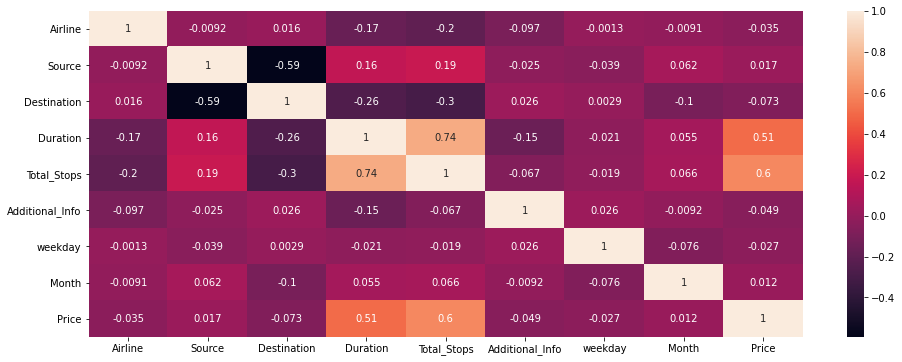

In [141]:
plt.figure(figsize=(16, 6))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

## Splitting the dataset

In [142]:
array = train_data.values
X = array[:, 0:8]
Y = array[:, 8]

## Feature Selection

In [143]:
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=6)
fit  = test.fit(X, Y)

# summarize scores
np.set_printoptions(precision=2)
print(fit.scores_)

features = fit.transform(X)
features[0:5, :]
'''

'\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import chi2\n\ntest = SelectKBest(score_func=chi2, k=6)\nfit  = test.fit(X, Y)\n\n# summarize scores\nnp.set_printoptions(precision=2)\nprint(fit.scores_)\n\nfeatures = fit.transform(X)\nfeatures[0:5, :]\n'

## Resclaing 

In [144]:
from sklearn.preprocessing import Normalizer

nz = Normalizer()
rescaled_X = nz.fit_transform(X)
test_rescaled_X = nz.transform(test_data)
rescaled_X

array([[0.0176236 , 0.        , 0.02937266, ..., 0.02937266, 0.0176236 ,
        0.0176236 ],
       [0.00224694, 0.00674082, 0.        , ..., 0.01123471, 0.00449388,
        0.00224694],
       [0.0035086 , 0.0017543 , 0.00087715, ..., 0.00438574, 0.        ,
        0.00789434],
       ...,
       [0.02219996, 0.        , 0.01109998, ..., 0.02774996, 0.01109998,
        0.02219996],
       [0.0560881 , 0.        , 0.03116006, ..., 0.03116006, 0.02492805,
        0.00623201],
       [0.00199947, 0.00399894, 0.00199947, ..., 0.00999736, 0.00799789,
        0.01799525]])

## Building the model

In [145]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(rescaled_X, Y, test_size=0.20, random_state=1)

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

models = []

models.append(('LR', LinearRegression()))
models.append(('LA', Lasso()))
models.append(('RFR', RandomForestRegressor()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))
models.append(('DTR', DecisionTreeRegressor()))

names = []
results = []

for name, model in models:
  model = model.fit(x_train, y_train)
  accuracy = model.score(x_valid, y_valid)
  results.append(accuracy)
  names.append(name)
  print('%s:%f'%(name, accuracy))

LR:0.410835
LA:0.398379
RFR:0.742239
EN:0.001055
KNN:0.716867
SVM:-0.019717
DTR:0.596009


## Improve performance using ensembles

In [147]:
# Random Forest Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


array = [10, 50, 100, 200, 500]

for num_trees in array:
  max_features = 5
  kfold = KFold(n_splits=10, random_state=7)
  model_1 = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
  results = cross_val_score(model_1, X, Y, cv=kfold)
  print('num_trees : %f (%f)'%(num_trees, results.mean()))

num_trees : 10.000000 (0.791300)
num_trees : 50.000000 (0.803549)
num_trees : 100.000000 (0.802303)
num_trees : 200.000000 (0.804537)
num_trees : 500.000000 (0.803855)


In [154]:
max_features = 5
model_2 = RandomForestRegressor(n_estimators=200, max_features=max_features)
model_2.fit(X, Y)
predictions = model_2.predict(test_data)
predictions

array([15158.675     ,  4386.38      , 12898.        , ...,
       15141.0875    ,  9380.9575    ,  8417.58916667])

In [149]:
predictions.shape

(2671,)

In [150]:
#from google.colab import files
#uploaded = files.upload()

In [151]:
#s = pd.read_excel('Sample_submission.xlsx')
#s

In [155]:
df = pd.DataFrame({'Price': predictions})
df 

,Price
0,15158.675000
1,4386.380000
2,12898.000000
3,12563.669833
4,4077.189167
...,...
2666,8035.190000
2667,4830.159368
2668,15141.087500
2669,9380.957500


In [156]:
df.to_csv('Price.csv', index=False)